## 使用內建功能讀取 txt 檔

# [教學目標]
- 示範 Pandas 各種 讀取 / 寫入 檔案的方式

# [範例重點]
- 讀取 txt 檔 (In[2], Out[2])
- 存取 json 檔 (In[4], In[5], In[7], In[8])
- 存取 npy 檔 (numpy專用檔, In[10], In[11]) 
- 讀取 Pickle 檔 (In[12], In[13])

In [1]:
with open("HomeCredit_data/example.txt", 'r') as f:
    data = f.readlines()
print(data)

['id,sex,age,score\n', '001,F,20,77\n', '002,F,25,90\n', '003,M,22,80\n', '004,F,30,66\n', '005,M,40,60\n', '006,M,29,87']


## 將 txt 轉成 pandas dataframe

In [2]:
import pandas as pd

data = []
with open("HomeCredit_data/example.txt", 'r') as f:
    for line in f:
        line = line.replace('\n', '').split(',') # 將每句最後的 /n 取代成空值後，再以逗號斷句
        data.append(line)
data

[['id', 'sex', 'age', 'score'],
 ['001', 'F', '20', '77'],
 ['002', 'F', '25', '90'],
 ['003', 'M', '22', '80'],
 ['004', 'F', '30', '66'],
 ['005', 'M', '40', '60'],
 ['006', 'M', '29', '87']]

In [3]:
df = pd.DataFrame(data[1:])
df.columns = data[0]
df

,id,sex,age,score
0,001,F,20,77
1,002,F,25,90
2,003,M,22,80
3,004,F,30,66
4,005,M,40,60
5,006,M,29,87


## 將資料轉成 json 檔後輸出
將 json 讀回來後，是否與我們原本想要存入的方式一樣? (以 id 為 key)

In [4]:
import json
df.to_json('HomeCredit_data/example01.json')

In [5]:
# 上面的存入方式，會將 column name 做為主要的 key, row name 做為次要的 key
with open('HomeCredit_data/example01.json', 'r') as f:
    j1 = json.load(f)
j1

{'id': {'0': '001',
  '1': '002',
  '2': '003',
  '3': '004',
  '4': '005',
  '5': '006'},
 'sex': {'0': 'F', '1': 'F', '2': 'M', '3': 'F', '4': 'M', '5': 'M'},
 'age': {'0': '20', '1': '25', '2': '22', '3': '30', '4': '40', '5': '29'},
 'score': {'0': '77', '1': '90', '2': '80', '3': '66', '4': '60', '5': '87'}}

In [6]:
df.set_index('id', inplace=True)
df

,sex,age,score
id,,,
001,F,20,77
002,F,25,90
003,M,22,80
004,F,30,66
005,M,40,60
006,M,29,87


In [7]:
df.to_json('HomeCredit_data/example02.json', orient='index')

In [8]:
with open('HomeCredit_data/example02.json', 'r') as f:
    j2 = json.load(f)
j2

{'001': {'sex': 'F', 'age': '20', 'score': '77'},
 '002': {'sex': 'F', 'age': '25', 'score': '90'},
 '003': {'sex': 'M', 'age': '22', 'score': '80'},
 '004': {'sex': 'F', 'age': '30', 'score': '66'},
 '005': {'sex': 'M', 'age': '40', 'score': '60'},
 '006': {'sex': 'M', 'age': '29', 'score': '87'}}

## 將檔案存為 npy 檔
一個專門儲存 numpy array 的檔案格式
使用 npy 通常可以讓你更快讀取資料喔!  
[建議閱讀](https://towardsdatascience.com/why-you-should-start-using-npy-file-more-often-df2a13cc0161)

In [9]:
import numpy as np
# 將 data 的數值部分轉成 numpy array
array = np.array(data[1:])
array

array([['001', 'F', '20', '77'],
       ['002', 'F', '25', '90'],
       ['003', 'M', '22', '80'],
       ['004', 'F', '30', '66'],
       ['005', 'M', '40', '60'],
       ['006', 'M', '29', '87']], dtype='<U3')

In [10]:
np.save(arr=array, file='HomeCredit_data/example.npy')

In [11]:
array_back = np.load('HomeCredit_data/example.npy')
array_back

array([['001', 'F', '20', '77'],
       ['002', 'F', '25', '90'],
       ['003', 'M', '22', '80'],
       ['004', 'F', '30', '66'],
       ['005', 'M', '40', '60'],
       ['006', 'M', '29', '87']], dtype='<U3')

## Pickle
存成 pickle 檔  
什麼都包，什麼都不奇怪的 [Pickle](https://docs.python.org/3/library/pickle.html)  
比如說 [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) 的資料集就是用 pickle 包的喔!

In [12]:
import pickle
with open('HomeCredit_data/example.pkl', 'wb') as f:
    pickle.dump(file=f, obj=data)

In [13]:
with open('HomeCredit_data/example.pkl', 'rb') as f:
    pkl_data = pickle.load(f)
pkl_data

[['id', 'sex', 'age', 'score'],
 ['001', 'F', '20', '77'],
 ['002', 'F', '25', '90'],
 ['003', 'M', '22', '80'],
 ['004', 'F', '30', '66'],
 ['005', 'M', '40', '60'],
 ['006', 'M', '29', '87']]

## 讀取圖片
常見的套件:
1. skimage
2. PIL
3. OpenCV

# [教學目標]
- 示範其他的讀圖檔方式

# [範例重點]
- 用 skimage.io 讀取圖檔 (In[15], Out[15])
- 用 PIL.Image 讀取圖檔 (In[16], Out[16])
- 用 OpenCV 讀取圖檔 (In[17], Out[17])

In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

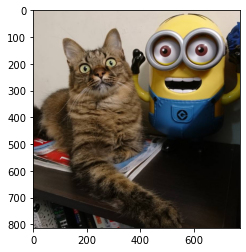

In [15]:
import skimage.io as skio
img1 = skio.imread('HomeCredit_data/example.jpg')
plt.imshow(img1)
plt.show()

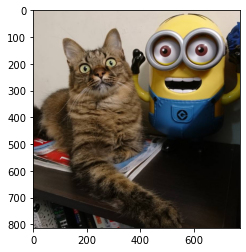

In [16]:
from PIL import Image
img2 = Image.open('HomeCredit_data/example.jpg') # 這時候還是 PIL object
img2 = np.array(img2)
plt.imshow(img2)
plt.show()

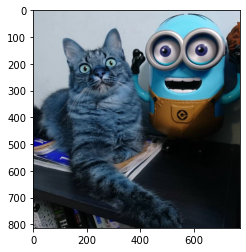

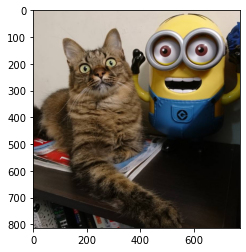

In [17]:
import cv2
img3 = cv2.imread('HomeCredit_data/example.jpg')
plt.imshow(img3)
plt.show()

img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.show()

### 比較三種開圖方式的時間 - 比較讀取 1000 次

In [18]:
N_times = 1000

In [19]:
%%timeit
im = np.array([skio.imread('HomeCredit_data/example.jpg') for _ in range(N_times)])

58.4 s ± 12 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
%%timeit
im = np.array([np.array(Image.open('HomeCredit_data/example.jpg')) for _ in range(N_times)])

43.7 s ± 3.06 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%%timeit
im = np.array([cv2.cvtColor(cv2.imread('HomeCredit_data/example.jpg'), cv2.COLOR_BGR2RGB) for _ in range(N_times)])

36.6 s ± 2.03 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 將影像存成 mat

In [22]:
import scipy.io as sio
sio.savemat(file_name='HomeCredit_data/example.mat', mdict={'img': img1})

In [23]:
mat_arr = sio.loadmat('HomeCredit_data/example.mat')
print(mat_arr.keys())

dict_keys(['__header__', '__version__', '__globals__', 'img'])


In [24]:
mat_arr = mat_arr['img']
print(mat_arr.shape)

(813, 771, 3)


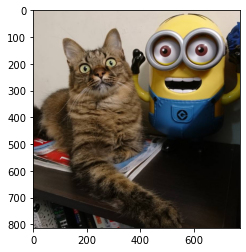

In [25]:
plt.imshow(mat_arr)
plt.show()

## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 
- 從清單網址讀取圖片

In [26]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [29]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [30]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = "\n"

data = data.split(split_tag)
print(len(data))
data[0]
arranged_data = [i.split('\t') for i in data]
arranged_data[0]

9996


['n00015388_157',
 'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg']

## 將 txt 轉成 pandas dataframe

In [31]:
import pandas as pd

df = pd.DataFrame(arranged_data)
df.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

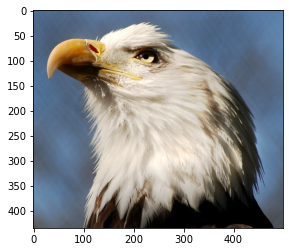

In [32]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,1]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [33]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    for url in url_list:
        response = requests.get(url)
        try:
            img = Image.open(BytesIO(response.content))
            img = np.array(img)
            img_list.append(img)
        except:
            continue
    return img_list

Total images that we got: 4 


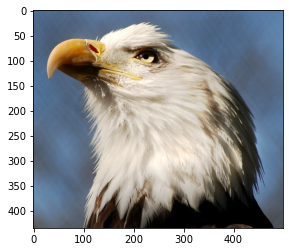

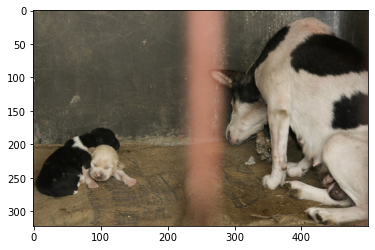

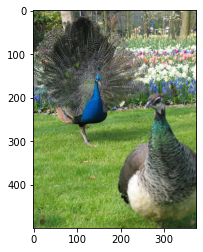

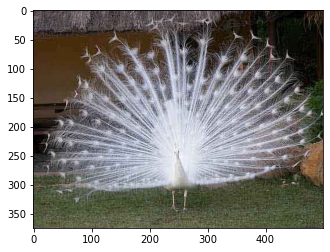

In [34]:
result = img2arr_fromURLs(df[0:5][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()